<a href="https://colab.research.google.com/github/JoshInkiriwang/Data_Science_Dicoding/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data

In [3]:
import zipfile
!gdown 1jGlc53Y2tqQc3WINHKLuWbqmGLxB5F-S

Downloading...
From: https://drive.google.com/uc?id=1jGlc53Y2tqQc3WINHKLuWbqmGLxB5F-S
To: /content/Cleaned_Students_Performance.zip
100% 9.94k/9.94k [00:00<00:00, 21.8MB/s]


In [4]:
local_zip = '/content/Cleaned_Students_Performance.zip'
zip_ref   = zipfile.ZipFile(local_zip,'r')   # read data
zip_ref.extractall('/content/')          # extract file
zip_ref.close()

In [5]:
df = pd.read_csv('Cleaned_Students_Performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [55]:
df.parental_level_of_education.value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [6]:
df.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


# Exploratory Data Analysis

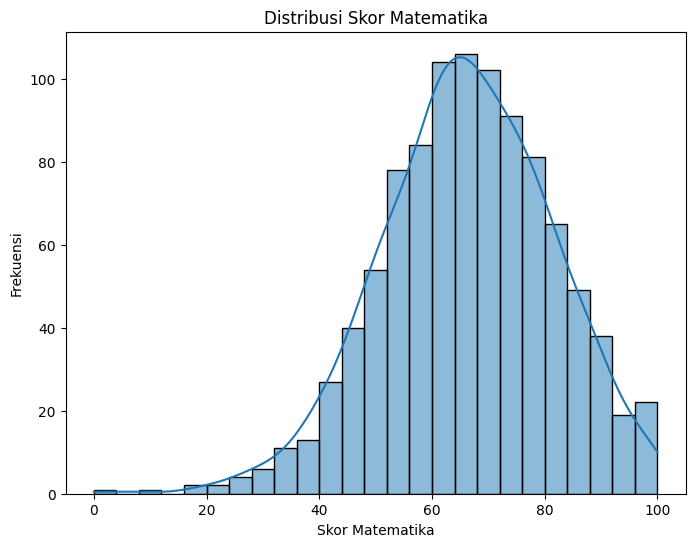

In [8]:
# 1. Distribusi Skor Matematika
plt.figure(figsize=(8, 6))
sns.histplot(df['math_score'], kde=True)
plt.title('Distribusi Skor Matematika')
plt.xlabel('Skor Matematika')
plt.ylabel('Frekuensi')
plt.show()

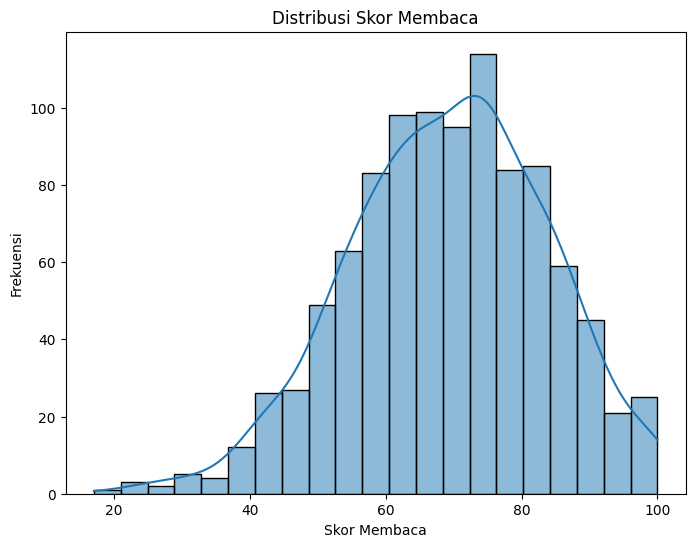

In [9]:
# 2. Distribusi Skor Membaca
plt.figure(figsize=(8, 6))
sns.histplot(df['reading_score'], kde=True)
plt.title('Distribusi Skor Membaca')
plt.xlabel('Skor Membaca')
plt.ylabel('Frekuensi')
plt.show()

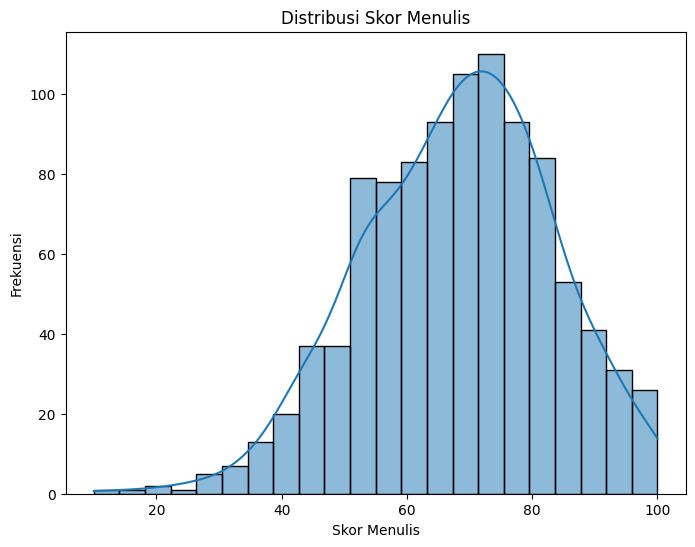

In [10]:
# 3. Distribusi Skor Menulis
plt.figure(figsize=(8, 6))
sns.histplot(df['writing_score'], kde=True)
plt.title('Distribusi Skor Menulis')
plt.xlabel('Skor Menulis')
plt.ylabel('Frekuensi')
plt.show()

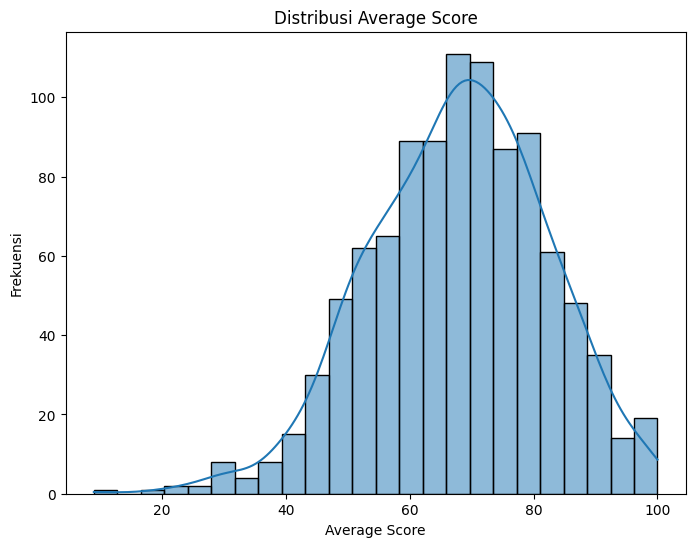

In [13]:
# Distribution of average score
plt.figure(figsize=(8, 6))
sns.histplot(df['average_score'], kde=True)
plt.title('Distribusi Average Score')
plt.xlabel('Average Score')
plt.ylabel('Frekuensi')
plt.show()

In [41]:
# Variabel Sementara untuk EDA
df['dapatMakan'] = df['lunch'].replace({0: 'Tidak', 1: 'Ya'})

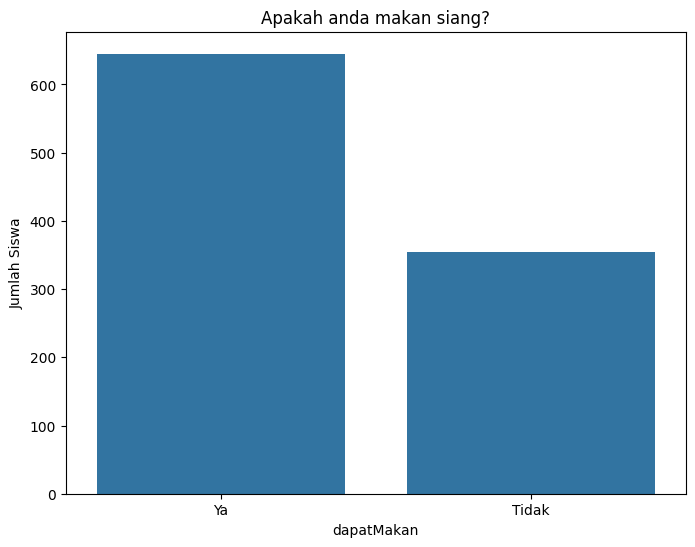

In [43]:
# Distribution of lunch
plt.figure(figsize=(8, 6))
sns.countplot(x='dapatMakan', data=df)
plt.title('Apakah anda makan siang?')
plt.ylabel('Jumlah Siswa')
plt.show()

In [45]:
# Variabel Sementara untuk EDA
df['jenisKelamin'] = df['gender'].replace({0: 'Perempuan', 1: 'Laki-Laki'})

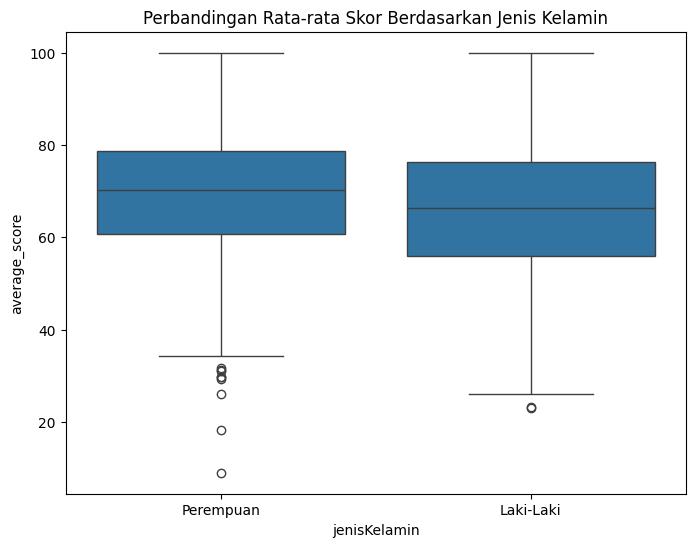

In [46]:
# 6. Boxplot Skor Berdasarkan Jenis Kelamin
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenisKelamin', y='average_score', data=df)
plt.title('Perbandingan Rata-rata Skor Berdasarkan Jenis Kelamin')
plt.show()

In [16]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

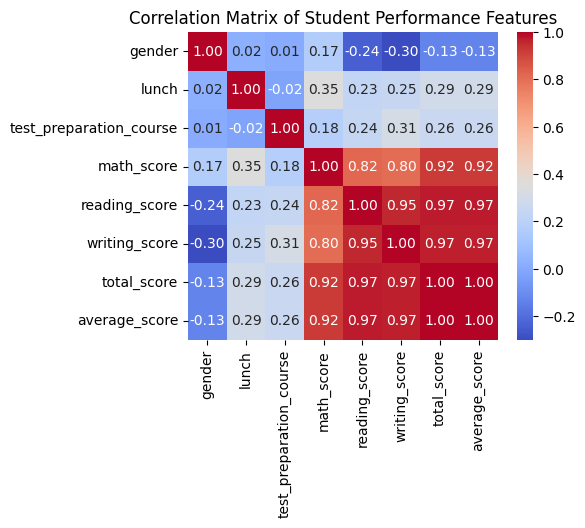

In [48]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Student Performance Features')
plt.show()

### Missing Value Data

In [18]:
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0
average_score,0


Dari data di atas menunjukkan bahwa tidak ada data yang kosong.

##Visualisasi Data

In [49]:
# Menghitung rata-rata skor untuk setiap kombinasi race/ethnicity dan lunch
average_scores = df.groupby(['race_ethnicity', 'dapatMakan'])['average_score'].mean().reset_index()
print("\nRata-rata Skor Total Berdasarkan Kelompok Etnis:")
print(average_scores)


Rata-rata Skor Total Berdasarkan Kelompok Etnis:
  race_ethnicity dapatMakan  average_score
0        group A      Tidak      57.657407
1        group A         Ya      66.616352
2        group B      Tidak      60.975845
3        group B         Ya      68.030303
4        group C      Tidak      60.412281
5        group C         Ya      70.868293
6        group D      Tidak      64.666667
7        group D         Ya      71.746507
8        group E      Tidak      67.495935
9        group E         Ya      74.929293


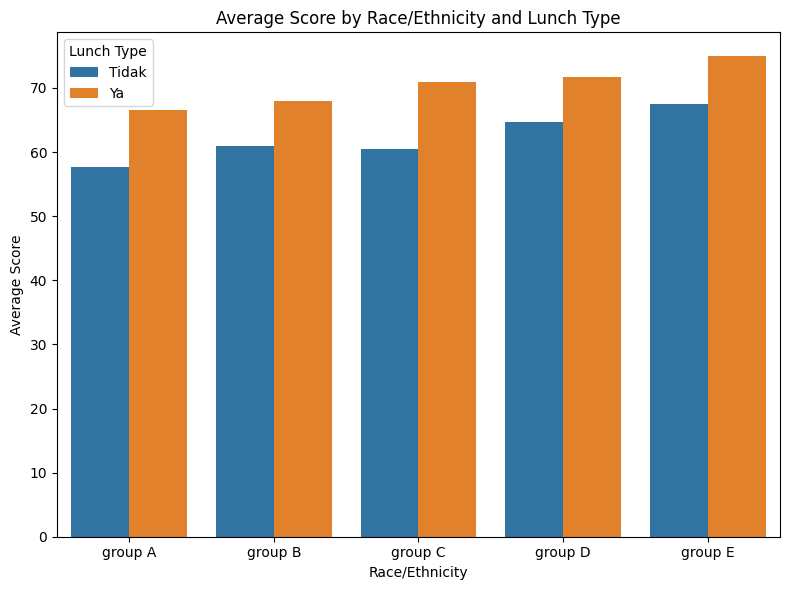

In [51]:
# Menghitung rata-rata skor untuk setiap kombinasi race/ethnicity dan lunch
average_scores = df.groupby(['race_ethnicity', 'dapatMakan'])['average_score'].mean().reset_index()

# Membuat grouped bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
sns.barplot(x='race_ethnicity', y='average_score', hue='dapatMakan', data=average_scores)

plt.title('Average Score by Race/Ethnicity and Lunch Type')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks
plt.legend(title='Lunch Type')
plt.tight_layout()
plt.show()

#Data Preprocessing

In [57]:
# Memisahkan fitur dan target
fitur = ['gender', 'lunch', 'test_preparation_course']
target = ['average_score']

X = df[fitur]
y = df[target]

In [24]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Inisialisasi model SVR dengan kernel 'rbf' (Radial Basis Function)
svr_model = SVR(kernel='rbf',  epsilon=0.1)

In [31]:
# Latih model menggunakan data latih
svr_model.fit(X_train_transformed, y_train)

SVR()

In [32]:
y_pred = svr_model.predict(X_test_transformed)

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 31.100030603236124


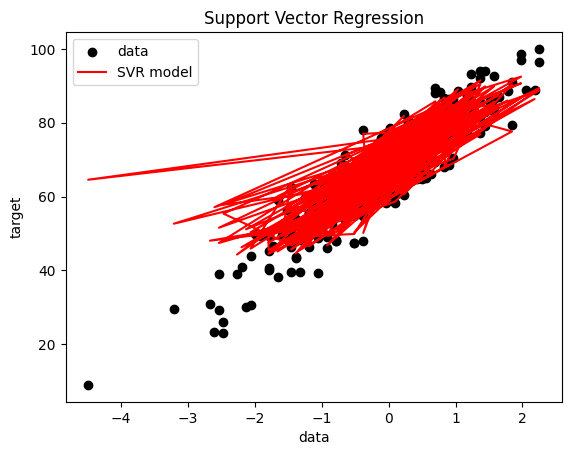

In [34]:
plt.scatter(X_test_transformed[:, 0], y_test, color='black', label='data') # Modified line
plt.plot(X_test_transformed[:, 0], y_pred, color='red', label='SVR model') # Modified line

# --- End of the problematic part ---

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

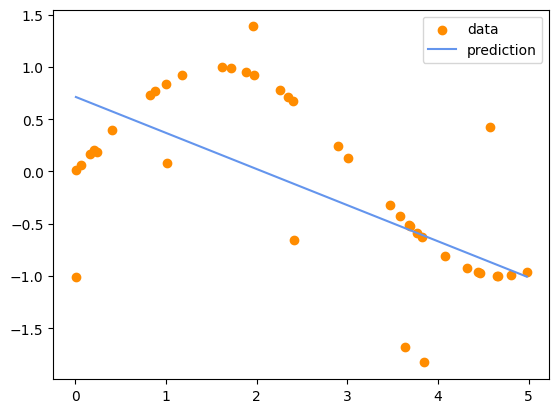

In [35]:
# generate synthetic data
X = np.sort(5 * np.random.rand(40, 1),
            axis=0)
y = np.sin(X).ravel()

# add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))

# create an SVR model with a linear kernel
svr = SVR(kernel='linear')

# train the model on the data
svr.fit(X, y)

# make predictions on the data
y_pred = svr.predict(X)

# plot the predicted values against the true values
plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

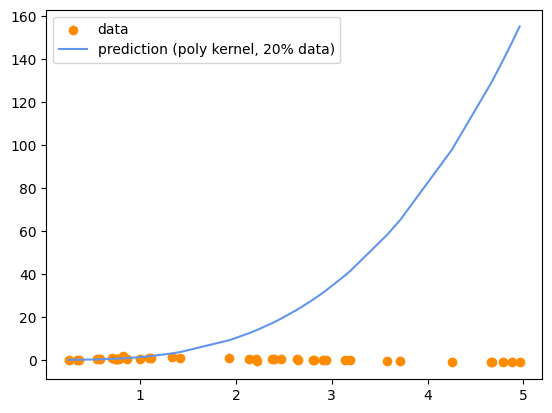

In [36]:
# Generate synthetic data (same as before)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))  # Add noise

# Calculate the number of samples for 20% of the data
num_samples_20_percent = int(0.20 * len(X))

# Select the first 20% of the data for training
X_20_percent = X[:num_samples_20_percent]
y_20_percent = y[:num_samples_20_percent]

# Create and train the SVR model using only the 20% data
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_20_percent, y_20_percent)

# Make predictions using the trained model on the entire dataset
y_pred_poly = svr_poly.predict(X)

# Plot the results, comparing the predictions to the true values
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_pred_poly, color='cornflowerblue', label='prediction (poly kernel, 20% data)')
plt.legend()
plt.show()

In [37]:

y_pred = svr_model.predict(X_test_transformed)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

print("\nFinal Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

R-squared: 0.8620439185739264
Root Mean Squared Error: 5.576740141268564

Final Model Performance:
Mean Squared Error: 31.100030603236124
Root Mean Squared Error: 5.576740141268564
R-squared: 0.8620439185739264
